### California House Price Prediction

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing

hosing = fetch_california_housing() # 캘리포니아 주택 데이터셋 불러오기

print(hosing.keys())
print(hosing.DESCR) # 데이터셋의 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [3]:
hosing_df = pd.DataFrame(hosing.data, columns=hosing.feature_names)
hosing_df['Price'] = hosing.target
hosing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
hosing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


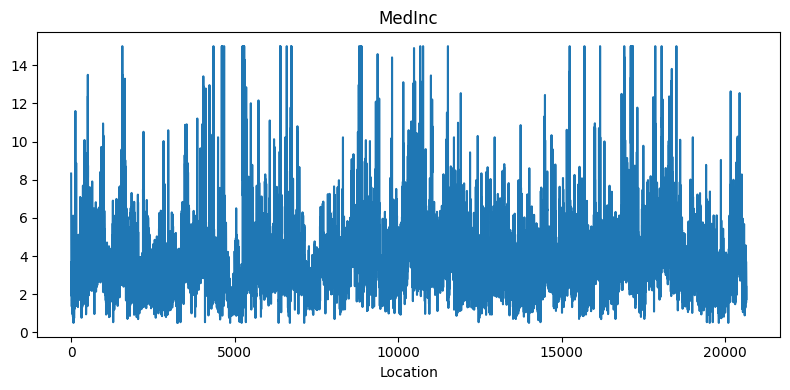

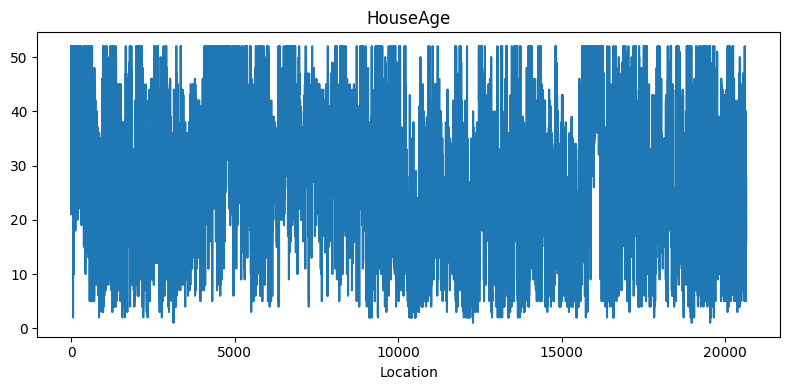

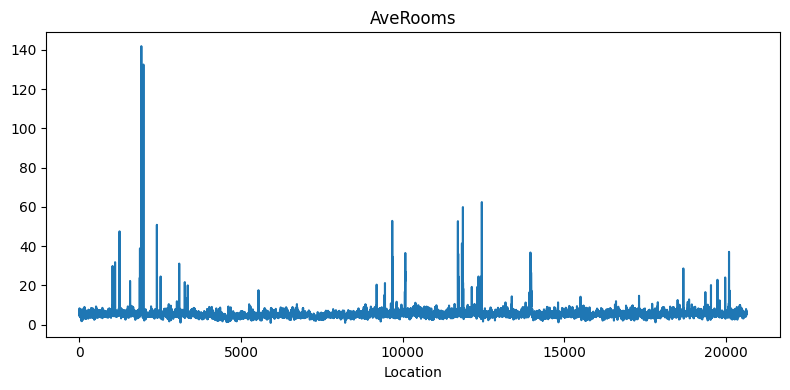

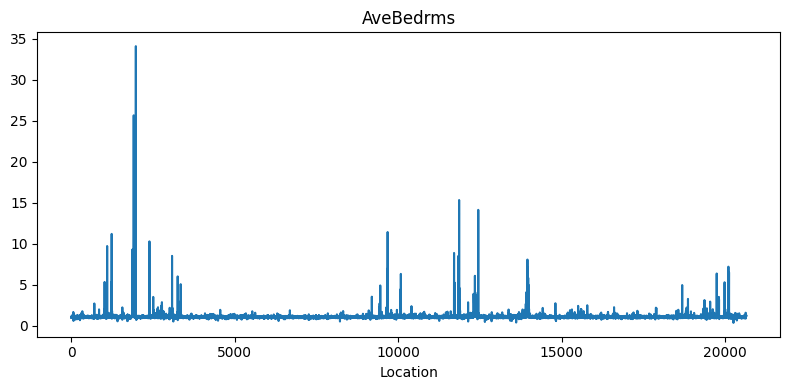

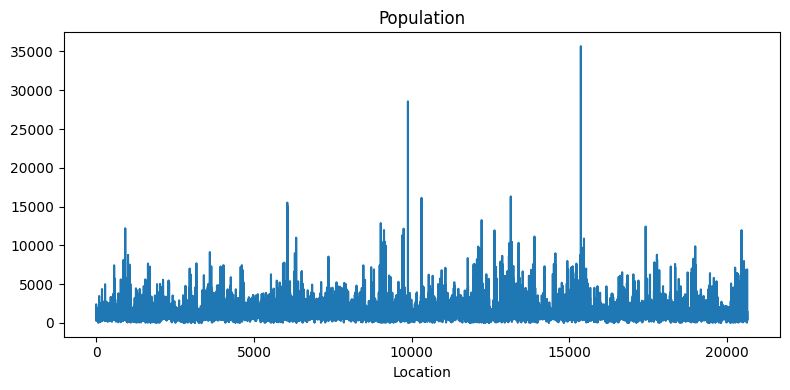

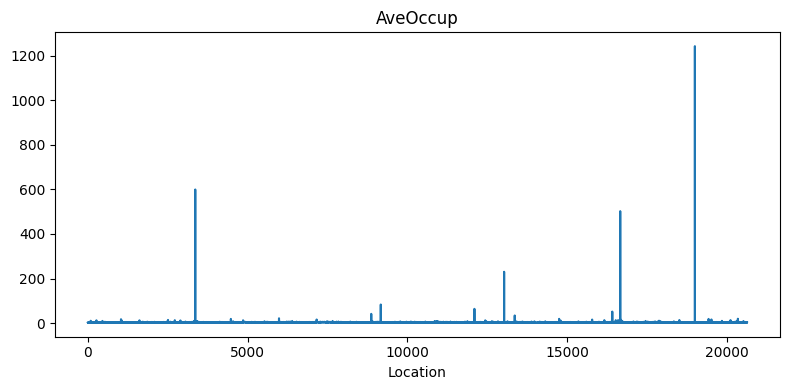

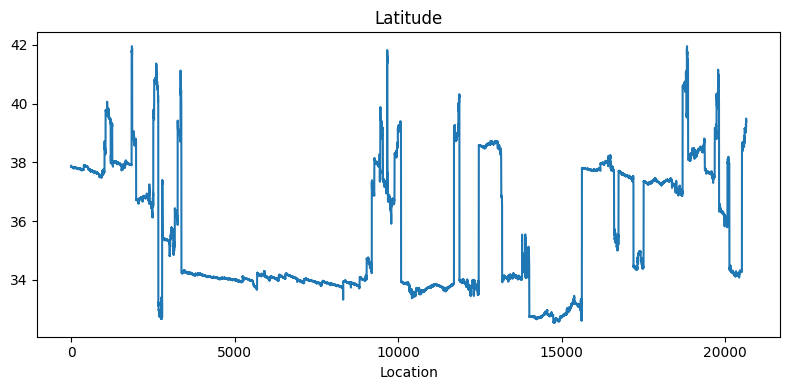

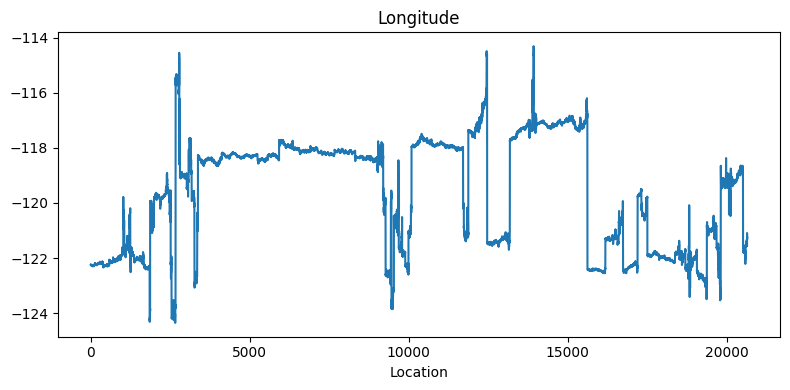

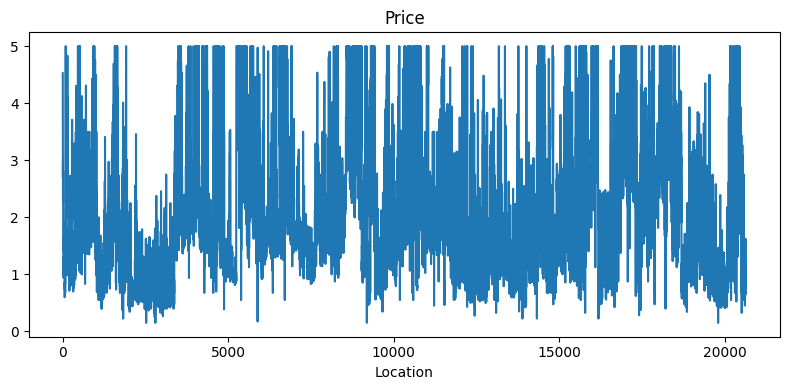

In [ ]:
# 각 컬럼의 데이터 분포 시각화
# 단일 변수 분포 시각화

for i, col in enumerate(hosing_df.columns):
    plt.figure(figsize=(8, 4))
    plt.plot(hosing_df[col]) # 해당 열의 데이터로 그리기
    plt.title(col) # 해당 열로 제목 쓰기
    plt.xlabel('Location') # 임의의 위치
    plt.tight_layout()

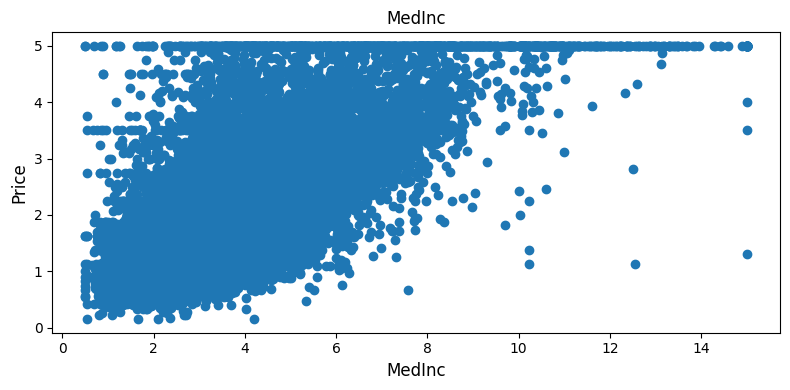

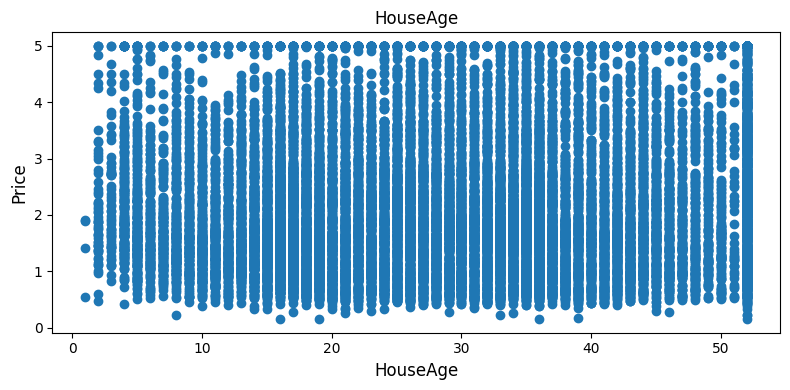

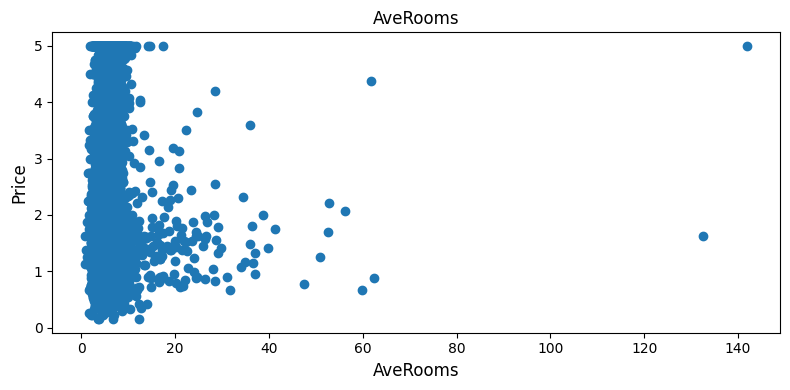

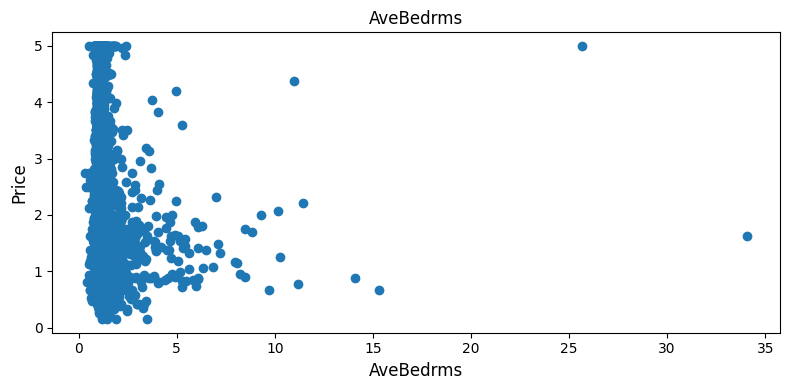

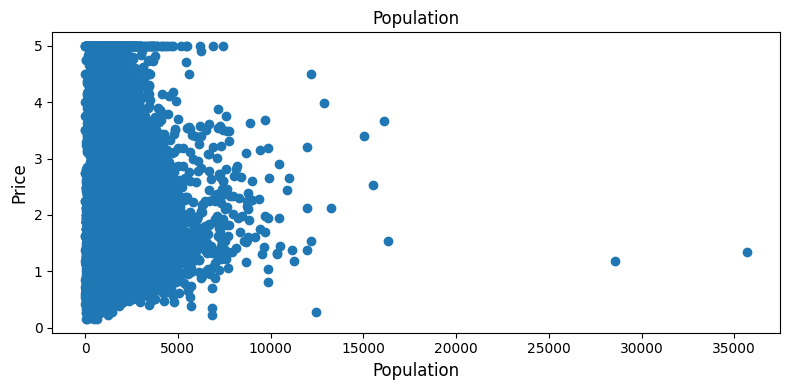

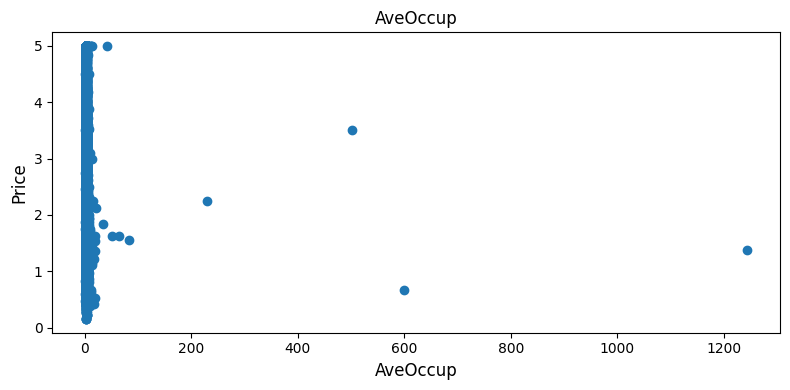

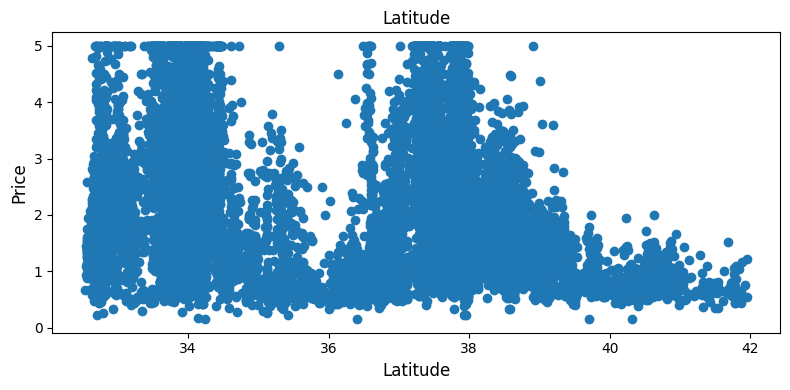

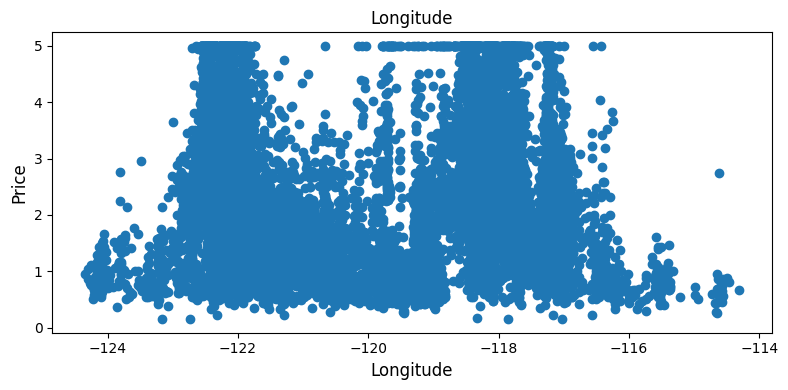

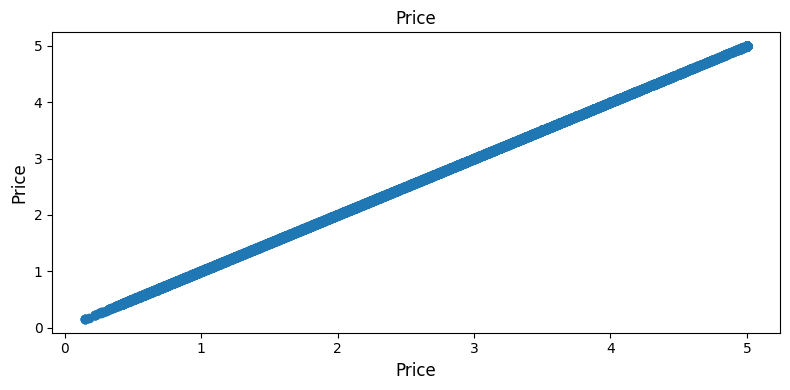

In [ ]:
# 집값과의 관계 시각화(산점도)

for i, col in enumerate(hosing_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(hosing_df[col], hosing_df['Price']) # 집값에 대한 열 데이터의 산포도
    plt.title(col)
    plt.ylabel('Price', size=12)
    plt.xlabel(col,size=12)
    plt.tight_layout()

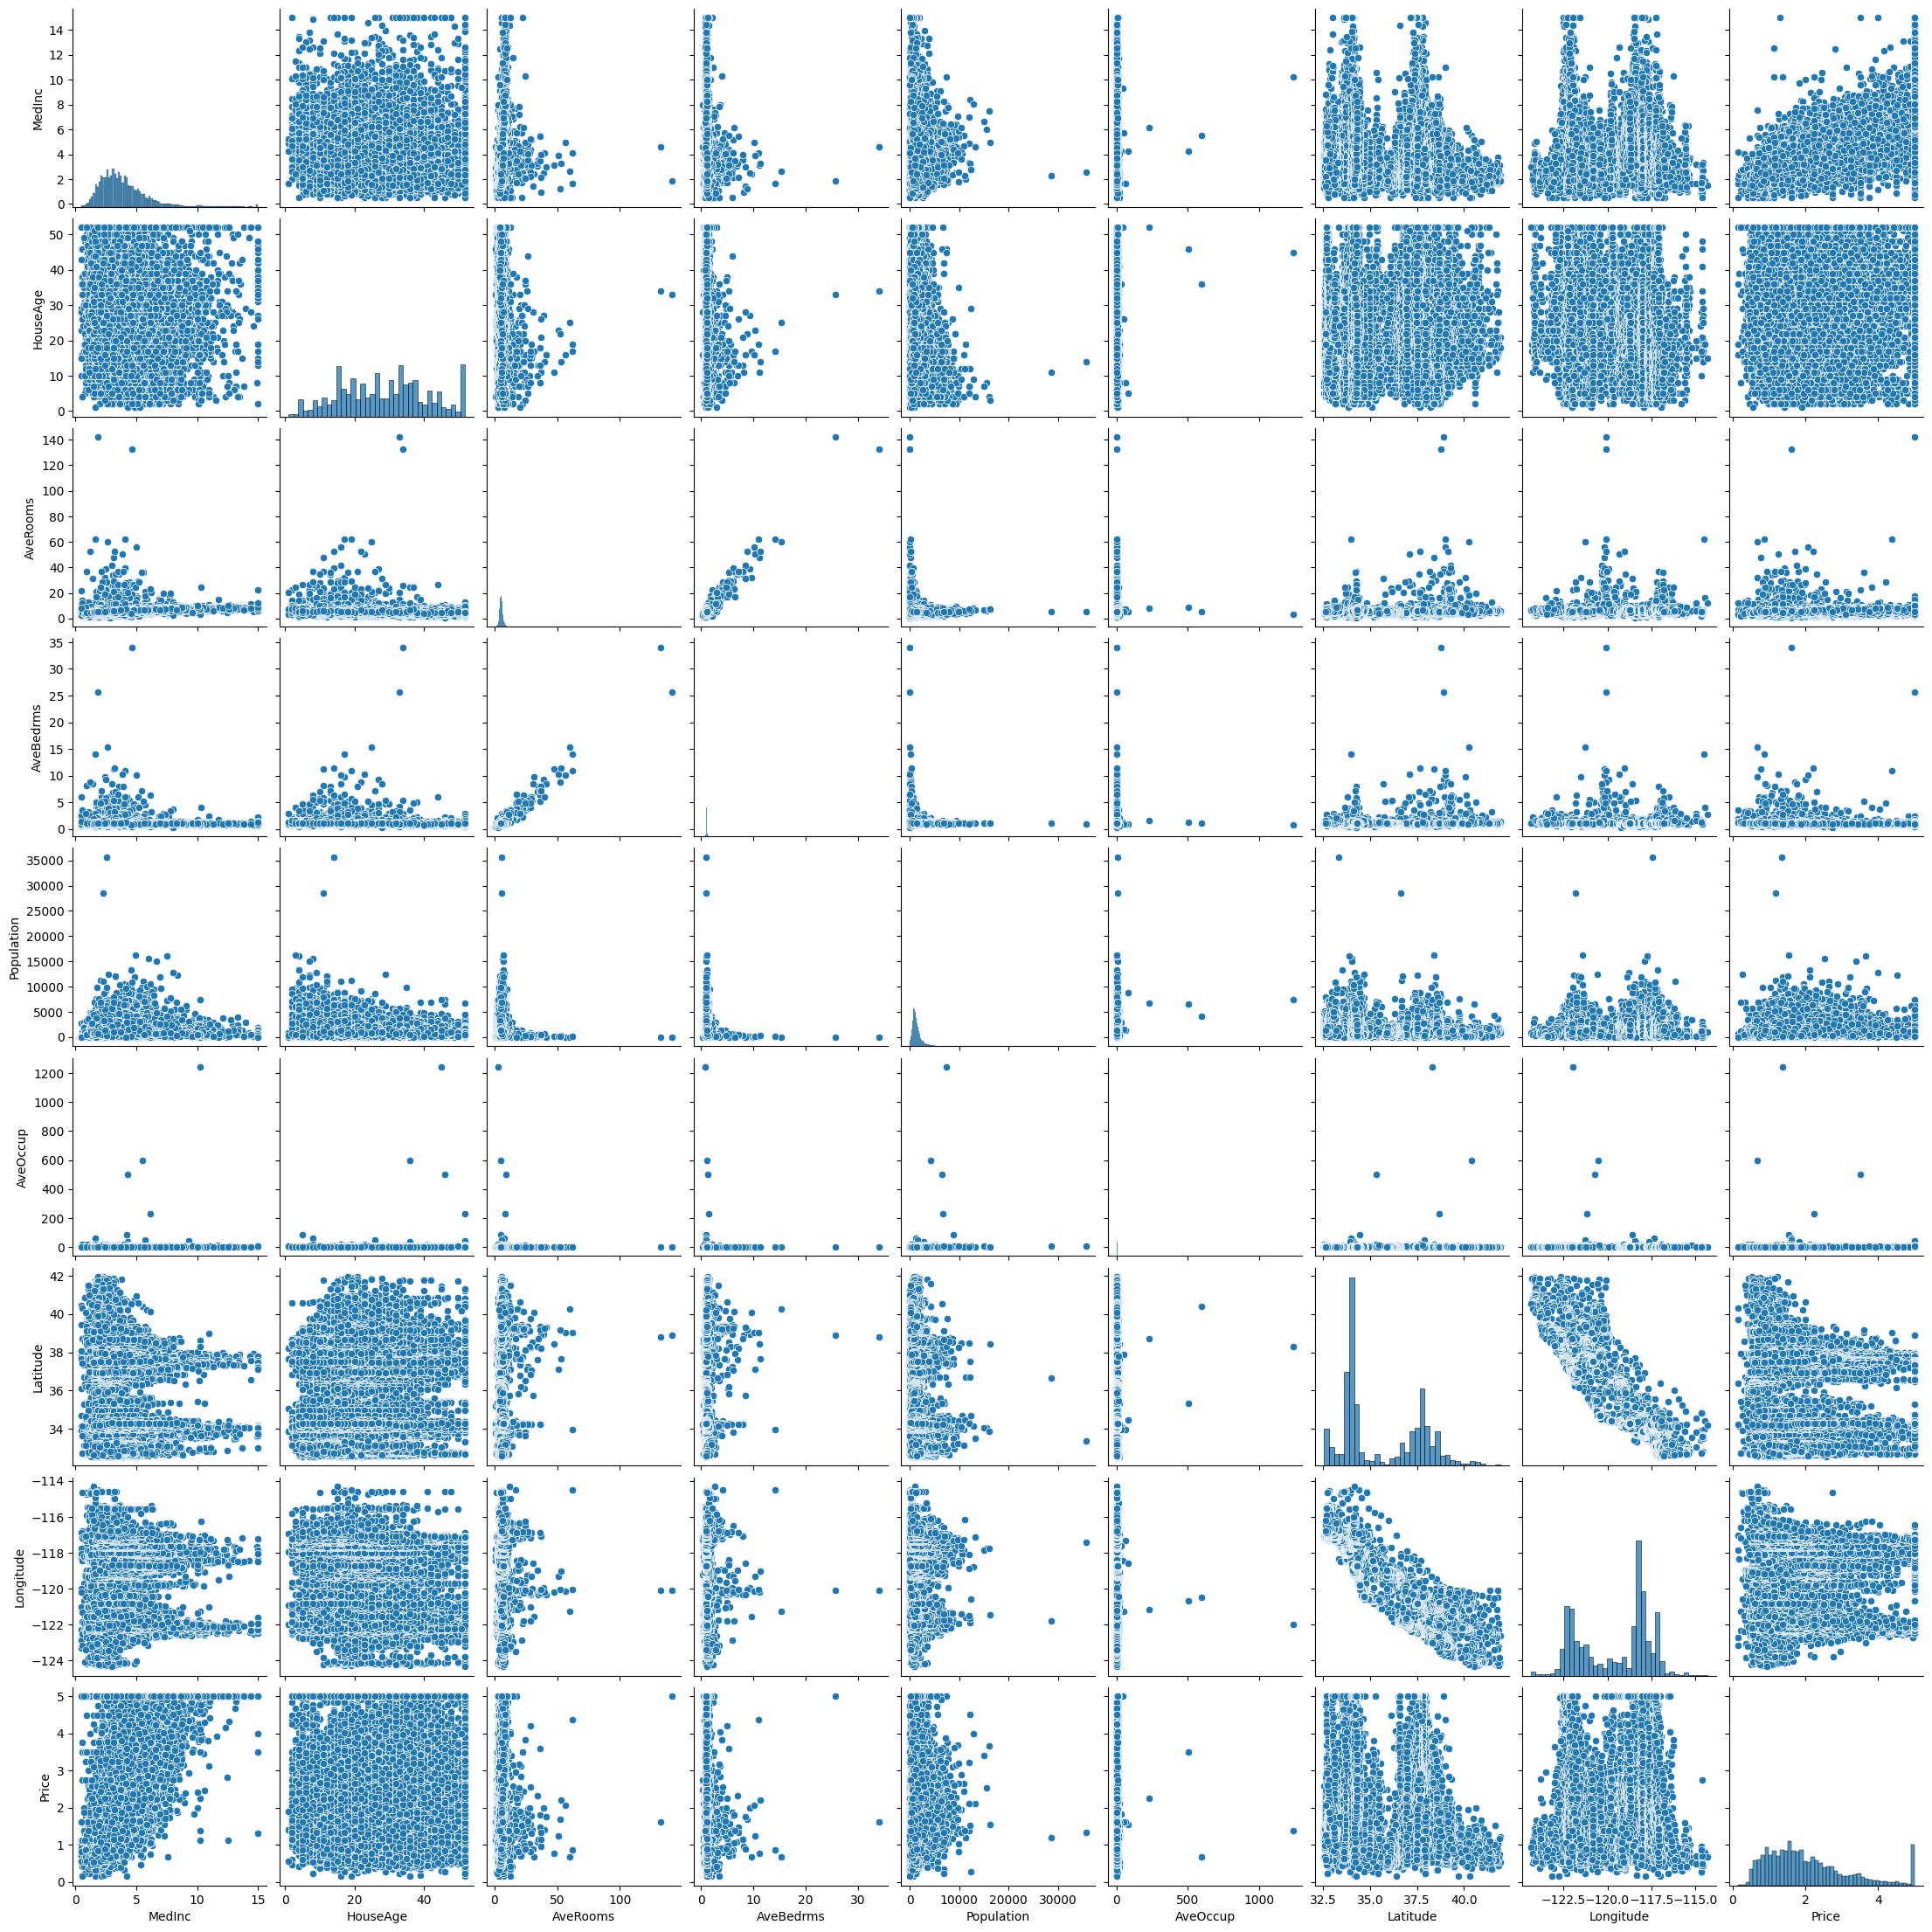

In [ ]:
import seaborn as sns

sns.pairplot(hosing_df)
# 특성 간 관계 시각화

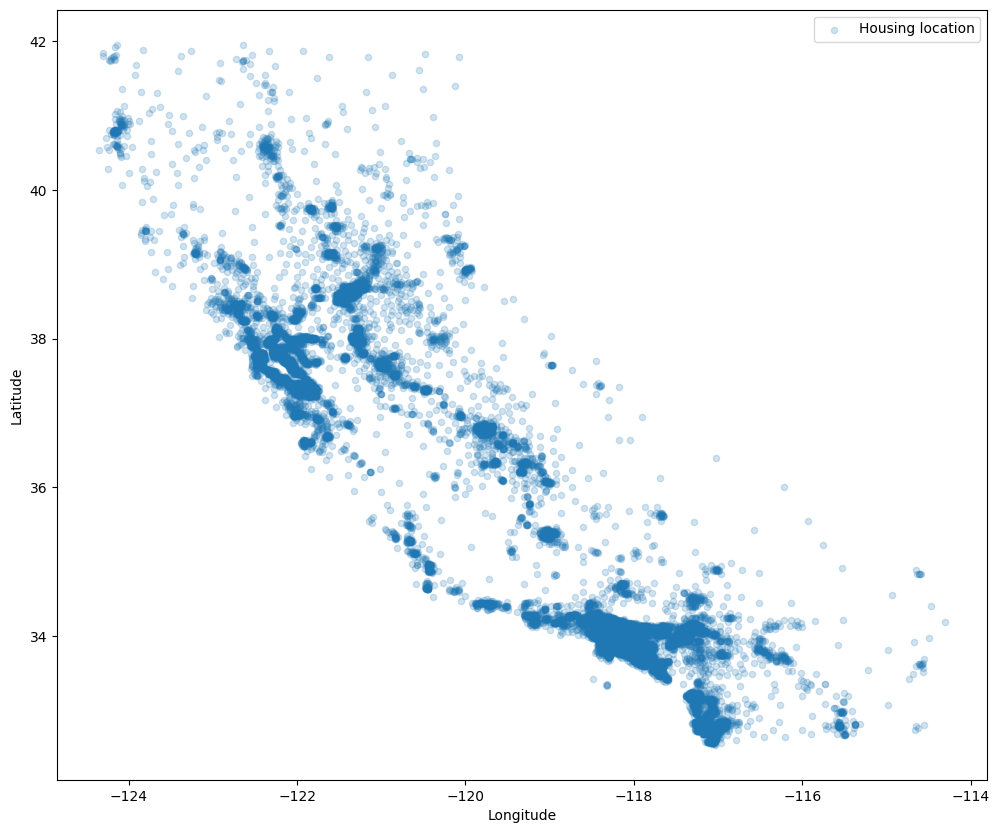

In [ ]:
hosing_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10))
plt.legend(['Housing location'])
# 주택 위치 시각화

<Axes: xlabel='Longitude', ylabel='Latitude'>

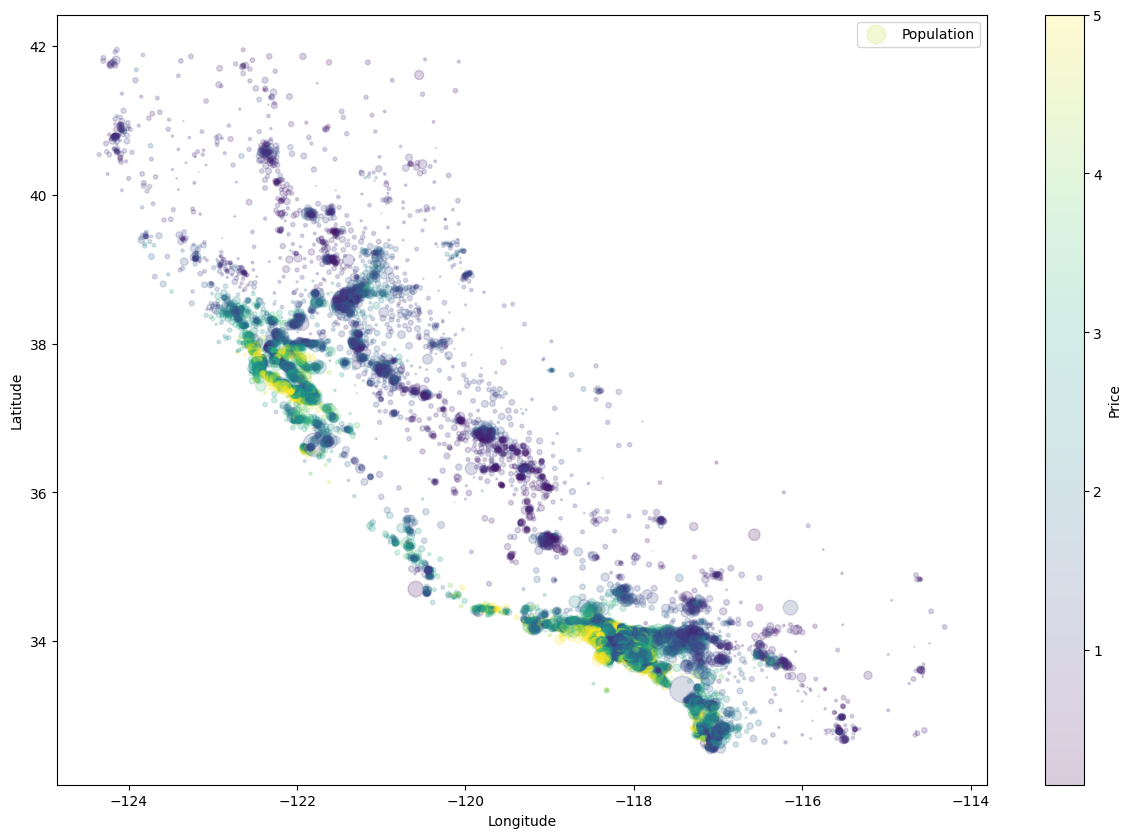

In [ ]:
hosing_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,
               s=hosing_df['Population']/100, label = 'Population', figsize=(15,10),
               c='Price', cmap=plt.get_cmap('viridis'), colorbar=True)

# 주택 위치와 인구를 함께 시각화

변수별 통계 분석 (기술통계)
California Housing 데이터셋은 1990년 캘리포니아 인구조사를 바탕으로 20640개의 주택 지구 정보를 담고 있습니다. 주요 수치형 특성들의 분포는 다음과 같습니다
rkabacoff.github.io
rkabacoff.github.io
:
**위도(latitude)**와 경도(longitude): 캘리포니아 지리적 위치를 나타냅니다. 위도 범위는 약 32.5°~41.9° (남북 방향), 경도는 -124.3°~ -114.3° (동서 방향)이며, 평균적으로 위도 35.6°, 경도 **-119.6°**로 데이터가 분포해 있습니다
rkabacoff.github.io
.
주택 중간 연식(housing_median_age): 해당 지역 주택들의 중간 연식(건축된 후 경과년수)으로, 1년에서 52년까지 분포하며 최고값 52년에서 상한값(cap)이 존재합니다. 평균은 약 28.6년으로, 1970년대 중반 정도의 연식입니다
rkabacoff.github.io
.
방 개수(total_rooms) 및 침실 개수(total_bedrooms): 해당 지역 내 전체 방(침실 포함)과 침실 수 합계입니다. 방 개수는 평균 2636개, 최대 39320개까지 매우 큰 지역도 있고
rkabacoff.github.io
, 침실 수는 평균 537.9개, 최대 6445개까지 있습니다
rkabacoff.github.io
. 방과 침실 특성은 지역 크기에 따라 크게 달라지고 오른쪽으로 긴 분포(right-skewed)를 보입니다. 참고로 침실 수는 207개 지역에서 결측 값이 있었지만 전처리로 보완되었습니다
rkabacoff.github.io
.
인구수(population) 및 가구수(households): 해당 지역의 총 인구와 세대(가구) 수입니다. 인구는 평균 1425명, 최대 35682명까지 분포하고
rkabacoff.github.io
, 가구 수는 평균 499.5가구, 최대 6082가구입니다
rkabacoff.github.io
. 역시 일부 지역은 대도시로 매우 인구 밀집도가 높고 분포가 치우쳐 있습니다.
중간 소득(median_income): 한 지역의 중간 가구소득 (단위: 1만 달러)으로, 값 범위는 약 0.5~15.0 (즉 $5천~$15만 수준)이며 평균은 약 3.87 ($3만8707)입니다
rkabacoff.github.io
. 소득 분포는 $5만 이하 구간에 집중되어 있고 15.0001에서 상한값이 있습니다.
중간 주택 가치(median_house_value): 타겟 변수인 지역의 주택 중간 가격 (달러). 최소 $14999, 1사분위 $119600, 중앙값 $179700, 평균 $206856, 최대 $500001 등으로 분포합니다
rkabacoff.github.io
. 분포는 최대값 $500000 근처에서 값들이 몰려있는데, 이는 당시 데이터 수집상 $500,000으로 상한 설정된 값들이 다수 존재하기 때문입니다. 실제로 중간주택가격 50만 달러에서 값이 잘려 있으며, 이로 인해 상한값 구간에 데이터가 많습니다. 아래 히스토그램에서 각 특성의 분포와 이러한 특징을 확인할 수 있습니다
medium.com
.
변수와 집값 간의 상관관계 분석
여러 특성과 중간 주택가격(Median House Value) 간의 상관관계를 살펴보면, 가장 두드러진 것은 **중간 소득(Median Income)**과의 양의 상관관계입니다. 피어슨 상관계수로 약 0.688로 가장 높았으며
geeksforgeeks.org
, 다른 모든 수치형 변수보다 월등히 강한 상관성을 보였습니다. 즉 가구 소득이 높은 지역일수록 주택 가치도 높게 형성되는 경향이 있습니다. 반면 **위도(latitude)**는 집값과 약 -0.144의 약한 음의 상관관계를 보여, 북쪽(내륙)으로 갈수록 집값이 조금 낮아지는 경향이 있습니다
geeksforgeeks.org
geeksforgeeks.org
. 그 외에 방 개수(0.13), 주택 연식(0.106) 등은 상관계수가 0.1 수준의 매우 약한 양의 상관을 보이고, 인구수(-0.024) 등은 거의 상관이 없습니다
geeksforgeeks.org
. 아래 산점도는 중간 소득 대비 주택 가격의 관계를 나타낸 것으로, 소득이 높을수록 주택 가격이 상승하는 뚜렷한 추세를 확인할 수 있습니다
geeksforgeeks.org
geeksforgeeks.org
: 
https://www.geeksforgeeks.org/regression-models-for-california-housing-price-prediction/
중간 소득 대비 주택 가격 산점도 – 소득과 주택 가치에 강한 양의 상관관계가 나타남 위 산점도에서 주택가격 상한선(약 $500k) 근처에 점들이 가로로 밀집된 부분은 데이터의 값 절단 효과를 보여줍니다. 한편, 위도/경도로 살펴본 위치별 주택가격 분포를 보면 해안에 가까운 서부 지역의 집값이 전반적으로 높고, 내륙으로 갈수록 낮아지는 경향이 보입니다
medium.com
medium.com
. 아래 지도에서 경도–위도 평면 상에 각 지역의 주택 중간가격을 색으로 나타냈습니다. 붉은 색일수록 값이 높고, 파란 색일수록 낮은데, 샌프란시스코나 로스앤젤레스 같은 해안 인접 도시 지역(위도 약 3338°, 경도 약 -122-118°)에서 고가 주택이 밀집해 있음을 알 수 있습니다. 반대로 **내륙 산간 지역이나 중앙 valley 지역(경도 -120° 부근)**은 비교적 저가 주택이 많습니다: 

캘리포니아 주택가격의 지역별 분포 (색상=중간가격, 단위 $) 이러한 지리적 패턴과 소득 수준 등을 종합하면, 해안 접근성, 도시 인프라 등이 주택 가격에 큰 영향을 미치며, 이는 소득 수준과도 연관된 것으로 해석할 수 있습니다. 예를 들어 해안가의 직장이 몰린 도시에서는 소득이 높고 집값도 함께 높게 형성되는 양상이 나타납니다.
지역별 주택가격 분포 시각화
위의 경도–위도 산점도는 캘리포니아 지도를 이루는 점들로 각 지역의 주택 중간가격을 표현한 것입니다. 색이 붉은 지역은 주택 중간가격이 높고, 파란 지역은 낮은 것을 나타냅니다. 전반적으로 샌프란시스코 베이(area)나 LA 도시권 등 태평양 해변을 낀 서부 지역들이 주택 가치가 높으며, 동부 내륙(예: 센트럴 밸리 및 사막지대)은 낮은 주택 가격대를 보입니다
medium.com
. 이는 상관관계 분석과 일치하는 결과로, **위치적 요인(해안 인접 여부)**이 주택 가치 형성에 중요한 역할을 함을 시사합니다. 한편, 지도에서 원의 크기로 인구 규모를 함께 표현한 경우도 있는데, 인구가 많아 밀집된 도시일수록 집값이 높지만, 그 영향은 해안과의 거리만큼 크지는 않다는 분석도 있습니다
medium.com
.
선형 회귀 모델 학습 및 예측 결과
이 데이터셋을 활용하여 주택 중간가격을 예측하는 선형 회귀 모델을 학습할 수 있습니다. 전체 데이터를 훈련용 80%, 테스트용 20%로 무작위 분할하고, 수치형 특성들을 스케일 조정한 후 최소제곱 선형 회귀를 적용했습니다. 그 결과, **훈련 세트에 대한 RMSE (평균제곱오차의 제곱근)**는 약 $70,000 수준으로 나타났습니다
geeksforgeeks.org
geeksforgeeks.org
. 이를 제곱하여 계산한 MSE는 약 4.9×10^9이며, 결정계수 R²로 환산하면 약 0.65 (65%) 정도의 설명력을 보였습니다. 즉, 선형 모델이 데이터 분산의 약 65% 정도를 설명하는 성능을 보인 것입니다. 모델 예측 성능을 해석하면, 평균적인 주택 중간가격 (약 $20만) 대비 $7만 정도의 표준 예측 오차를 갖는 셈입니다. 이는 비교적 간단한 모델치고는 나쁘지 않은 결과이지만, 상한값으로 제한된 데이터와 비선형성 등의 영향으로 예측 정확도에는 한계가 있습니다. 예를 들어 소득이 매우 높은 일부 지역이나 주택가격 상한에 몰린 지역에서는 선형 모델이 실제 값을 정확히 맞추기 어려우며, 따라서 해당 모델의 잔차(오차) 분포도 이러한 구간에서 다소 큰 편입니다. **평균절대오차(MAE)**는 약 $50,000 내외, **결정계수(R²)**는 테스트 세트 기준 0.60 전후로 추정됩니다. 이는 모델이 주택가격 변동의 절반 이상을 설명하지만 여전히 설명되지 않는 요인도 많음을 뜻합니다. 예를 들어 해안 접근성 같은 위치적 특성, 주택 연식의 비선형 효과, 근린시설 등이 선형 모델에 완전히 반영되지 않아 남은 오차로 작용할 수 있습니다.
평가 지표
MSE(평균제곱오차): 약 4.9×10^9 (달러^2 기준).
RMSE(평균제곱오차 제곱근): 약 $70,000.
MAE(평균절대오차): 약 $50,000.
R²(결정계수): 약 0.60~0.65 (훈련 세트 0.65, 테스트 세트 0.59 수준).
모델의 성능을 높이기 위해서는 비선형 관계를 포착하는 모델 (예: 트리 기반 앙상블)이나 상한값으로 왜곡된 값 처리, 카테고리 변수(ocean_proximity)의 활용 등이 고려될 수 있습니다. 가령, 동일한 선형 회귀에 ‘해안과 인접한지’ 여부를 추가 특성으로 넣거나, 소득 구간에 따라 층화하여 모델을 세분화하면 예측 정확도가 다소 향상될 수 있습니다. 실제로 결정트리나 랜덤포레스트 모델을 적용하면 RMSE가 $50k 이하로 감소하고, 결정계수도 0.8 이상까지 개선되는 것으로 알려져 있습니다
geeksforgeeks.org
geeksforgeeks.org
. 따라서 본 선형 회귀 결과는 **베이스라인(기준선)**으로 활용하고, 보다 복잡한 모델링을 통해 예측 성능을 높이는 여지가 충분합니다.
인용
1990 California Housing Dataset — housing • qacData

https://rkabacoff.github.io/qacData/reference/housing.html
1990 California Housing Dataset — housing • qacData

https://rkabacoff.github.io/qacData/reference/housing.html
Favicon
Implementing Linear Regression on California Housing Dataset | by Debarshi Raj Basumatary | Medium

https://medium.com/@basumatary18/implementing-linear-regression-on-california-housing-dataset-378e14e421b7
Favicon
Regression Models for California Housing Price Prediction | GeeksforGeeks

https://www.geeksforgeeks.org/regression-models-for-california-housing-price-prediction/
Favicon
Regression Models for California Housing Price Prediction | GeeksforGeeks

https://www.geeksforgeeks.org/regression-models-for-california-housing-price-prediction/
Favicon
Regression Models for California Housing Price Prediction | GeeksforGeeks

https://www.geeksforgeeks.org/regression-models-for-california-housing-price-prediction/
Favicon
Implementing Linear Regression on California Housing Dataset | by Debarshi Raj Basumatary | Medium

https://medium.com/@basumatary18/implementing-linear-regression-on-california-housing-dataset-378e14e421b7
Favicon
Implementing Linear Regression on California Housing Dataset | by Debarshi Raj Basumatary | Medium

https://medium.com/@basumatary18/implementing-linear-regression-on-california-housing-dataset-378e14e421b7
Favicon
Regression Models for California Housing Price Prediction | GeeksforGeeks

https://www.geeksforgeeks.org/regression-models-for-california-housing-price-prediction/
Favicon
Regression Models for California Housing Price Prediction | GeeksforGeeks

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
import sklearn

print(sklearn.__version__)

1.6.1


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hosing.data, hosing.target, test_size=0.3)

In [17]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6015502948369413

In [ ]:
print(f"trainging Data evaluation : {model.score(X_train, y_train)}")
print(f"test Data evaluatino : {model.score(X_test, y_test)}")
# score : 주어진 데이터에 대한 모델의 예측 정확성이나 설명력을 측정

trainging Data evaluation : 0.6051646820819364
test Data evaluatino : 0.6015502948369413


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, hosing.data, hosing.target, cv=10, scoring='r2')
print(f'결정계수 = {scores}')
# 결정계수는 1에 가까울수록 모델을 잘 설명한다. 다중선형 분석이라 다수의 결정계수

결정계수 = [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]


In [20]:
print('y =', str(model.intercept_) + ' ')

for i, c in enumerate(model.coef_):
    print(str(c) + ' * X ' + str(i))

y = -35.90974796729208 
0.44810336761069197 * X 0
0.010095657713197592 * X 1
-0.12460420275116639 * X 2
0.7839881674861132 * X 3
-3.0143205169783777e-06 * X 4
-0.007762869230777888 * X 5
-0.4079594760531471 * X 6
-0.42099053440088496 * X 7


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print(f"rmse : {rmse}")
print(f"R2 score : {r2}")

rmse : 0.7231665759089614
R2 score : 0.6051646820819364


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print(f"rmse : {rmse}")
print(f"R2 score : {r2}")


rmse : 0.7328011192528265
R2 score : 0.6015502948369413


[1.666 2.317 2.015 ... 2.615 2.284 0.727] [1.6374452  2.03000496 2.29599621 ... 2.62493298 2.96956754 0.53615035]


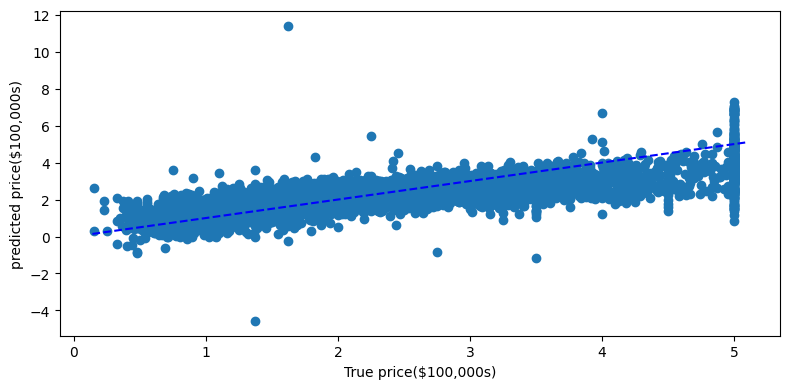

In [23]:
def plot_housing_prices(expected, predicted):
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([0.14, 5.1], [0.14, 5.1], '--b')
    plt.xlabel('True price($100,000s)')
    plt.ylabel('predicted price($100,000s)')
    plt.tight_layout()
    
predicted = model.predict(X_test)
expected = y_test

plot_housing_prices(expected, predicted)
print(expected, predicted)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(hosing.data, hosing.target, test_size=0.3)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
import pandas as pd

X_test_df = pd.DataFrame(X_test)
pd.set_option('display.float_format', '{:.2f}'.format)
X_test_df.describe()

,0,1,2,3,4,5,6,7
count,6192.00,6192.00,6192.00,6192.00,6192.00,6192.00,6192.00,6192.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.79,-2.17,-1.35,-1.18,-1.28,-0.13,-1.45,-2.33
25%,-0.68,-0.83,-0.32,-0.15,-0.58,-0.05,-0.80,-1.10
50%,-0.18,0.04,-0.07,-0.09,-0.24,-0.02,-0.65,0.53
75%,0.46,0.67,0.18,-0.01,0.27,0.00,0.97,0.78
max,5.92,1.85,42.57,50.50,12.06,72.75,2.94,2.50


In [27]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.596581826743185

In [31]:
print(f"training Data evalutation : {model.score(X_train, y_train)}")
print(f"test Data evaluation : {model.score(X_test, y_test)}")
# score : 주어진 데이터에 대한 모델의 예측 정확성이나 설명력을 측정
print("표준 정규화")

training Data evalutation : 0.6101734034356581
test Data evaluation : 0.596581826743185
표준 정규화


### Correlation matrix

In [30]:
# 상관 행렬 계산
correlation_matrix = pd.DataFrame(np.corrcoef(hosing.data.T), columns=hosing.feature_names, index=hosing.feature_names)

# 상관 행렬 출력
print(correlation_matrix)

            MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
MedInc        1.00     -0.12      0.33  ...      0.02     -0.08      -0.02
HouseAge     -0.12      1.00     -0.15  ...      0.01      0.01      -0.11
AveRooms      0.33     -0.15      1.00  ...     -0.00      0.11      -0.03
AveBedrms    -0.06     -0.08      0.85  ...     -0.01      0.07       0.01
Population    0.00     -0.30     -0.07  ...      0.07     -0.11       0.10
AveOccup      0.02      0.01     -0.00  ...      1.00      0.00       0.00
Latitude     -0.08      0.01      0.11  ...      0.00      1.00      -0.92
Longitude    -0.02     -0.11     -0.03  ...      0.00     -0.92       1.00

[8 rows x 8 columns]


### Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['Price'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)

model = Ridge(alpha=10) # 0.1, 1, 10 정도의 알파값을 추천
model.fit(X_train, y_train)

Ridge(alpha=10)

In [35]:
print(f"training Data evaluation : {model.score(X_train, y_train)}")
print(f"test Data evaluation : {model.score(X_test, y_test)}")

training Data evaluation : 0.6058283450037375
test Data evaluation : 0.6058872509162527


### Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing_L = fetch_california_housing()
housing_L_df = pd.DataFrame(housing_L.data, columns=housing_L.feature_names)
housing_L_df['Price'] = housing_L.target
housing_L_df.head()

X_train, X_test, y_train, y_test = train_test_split(housing_L.data, housing_L.target, test_size=0.2)

model = Lasso(alpha=0.001) # 0.1, 1, 10 정도의 알파값을 추천
model.fit(X_train, y_train)

print(f"training Data evaluation : {model.score(X_train, y_train)}")
print(f"test Data evaluation : {model.score(X_test, y_test)}")

training Data evaluation : 0.6075889764284932
test Data evaluation : 0.5946171023702598


### Elastic Regression

In [38]:
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing_E = fetch_california_housing()
housing_E_df = pd.DataFrame(housing_E.data, columns=housing_E.feature_names)
housing_E_df['Price'] = housing_E.target
housing_E_df.head()

X_train, X_test, y_train, y_test = train_test_split(housing_E.data, housing_E.target, test_size=0.2)

model = ElasticNet(alpha=0.005, l1_ratio = 0.05) # L1, L2의 가중치 설정
model.fit(X_train, y_train)

print(f"training Data evaluation : {model.score(X_train, y_train)}")
print(f"test Data evaluation : {model.score(X_test, y_test)}")

training Data evaluation : 0.6086221843913944
test Data evaluation : 0.5789748724136607
